<a href="https://colab.research.google.com/github/abdullahshabbir2/Grocery-WareHouse/blob/main/python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Displaying first rows of DataSet
      Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0   284.161690    Blade       colGrain           25    4.460592   7.937116   
1  1599.551748    Blade    singleGrain            9    1.425973   2.432948   
2   768.311031   Nozzle       colGrain           26    2.508879   3.841211   
3  1697.663828    Blade       colGrain           12    3.248913   2.610700   
4  1491.478862   Nozzle       colGrain           20    1.901670   4.634926   

   smallDefects  largeDefects  sliverDefects seedLocation    castType  
0            22             0              7          Top  Investment  
1             2             0              0       Bottom         Die  
2            25             0              0       Bottom  Investment  
3            10             0              0       Bottom  Continuous  
4            24             0              0          Top         Die  


Statistics
          Lifespan  coolingRate   quenchTime    forge

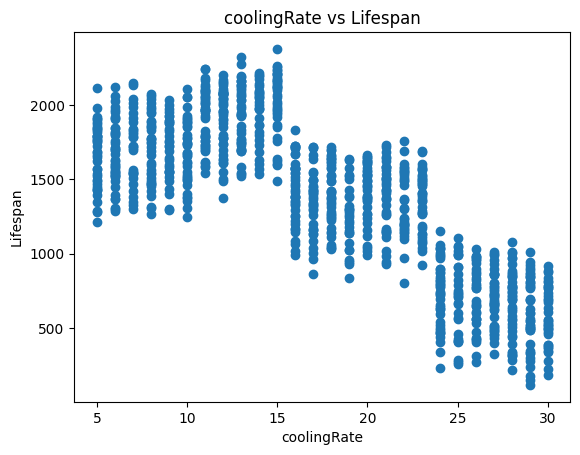

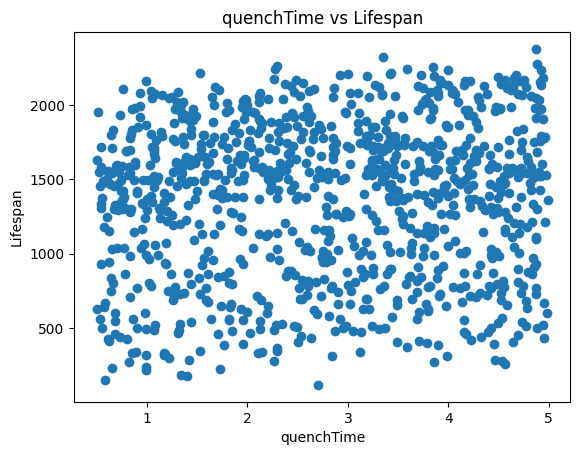

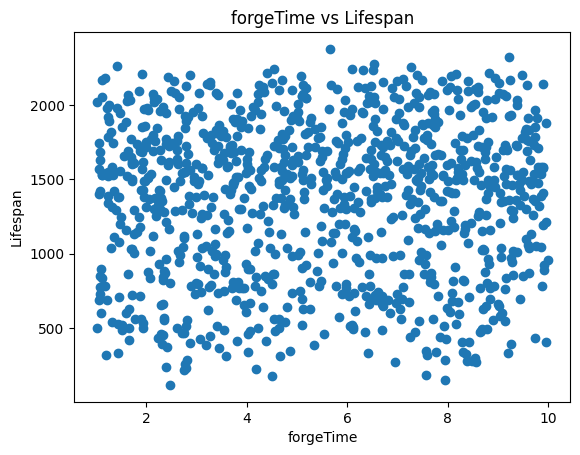

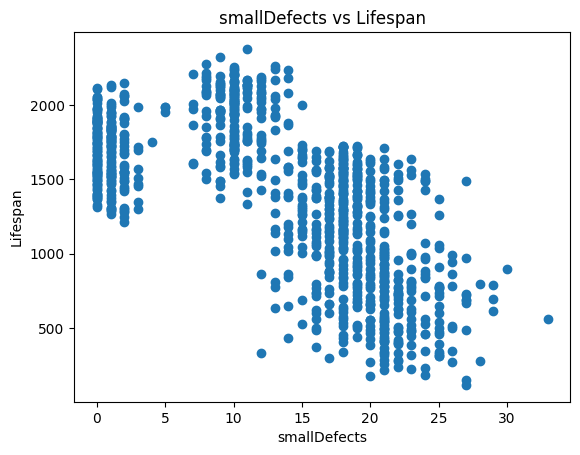

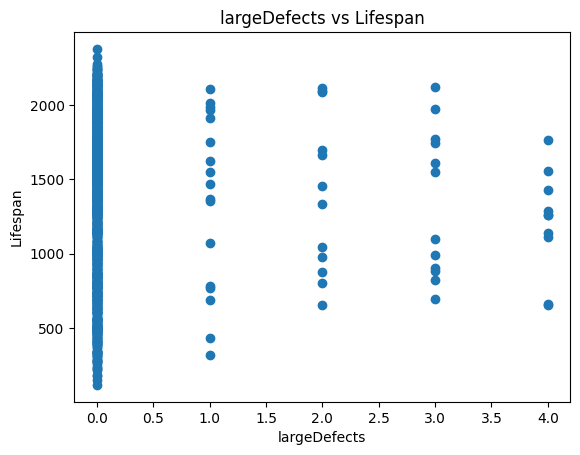

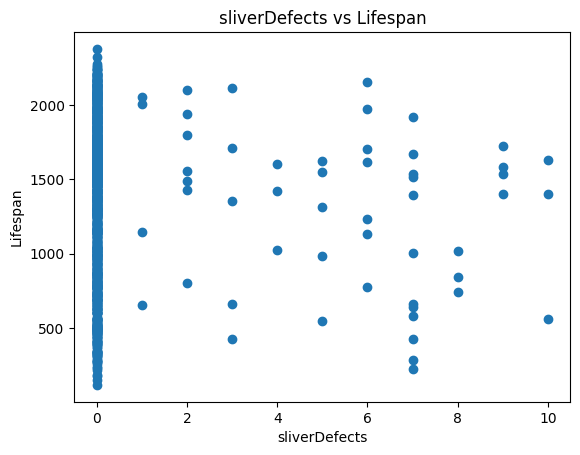



Categorical features vs LifeSpan


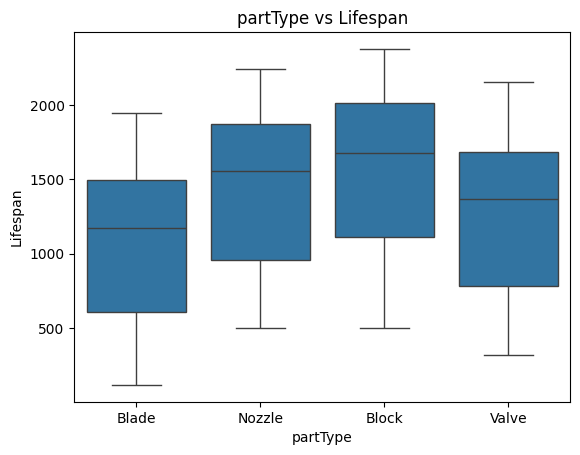

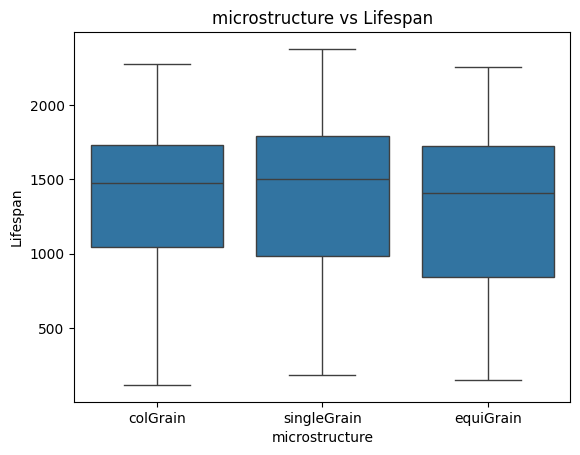

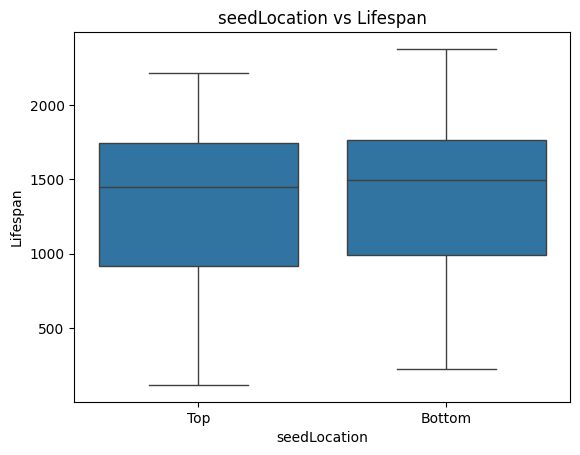

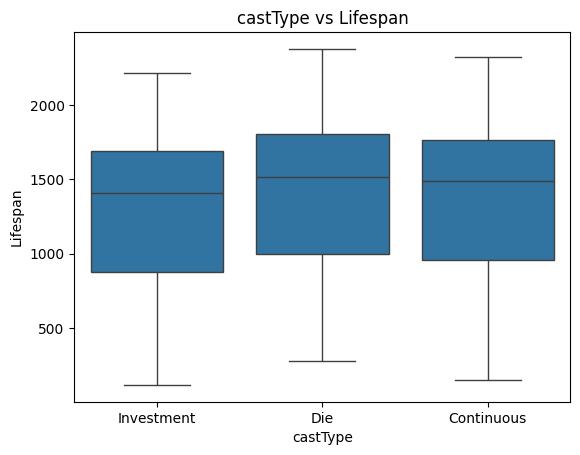

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file into a DataFrame
file_path = "COMP1801_CourseworkDataset1_tabular.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Displaying first rows of DataSet")
print(df.head())

# Summary statistics
print("\n\nStatistics")
print(df.describe())

# Correlation matrix for numerical features
print("\n\nCorrelation Matrix")
numerical_features = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)

# Scatter plots for numerical features vs Lifespan
print("\n\nNumerical features vs LifeSpan")
numerical_features = ['coolingRate', 'quenchTime', 'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects']
for feature in numerical_features:
    plt.scatter(df[feature], df['Lifespan'])
    plt.xlabel(feature)
    plt.ylabel('Lifespan')
    plt.title(f'{feature} vs Lifespan')
    plt.show()

# Box plots for categorical features vs Lifespan
print("\n\nCategorical features vs LifeSpan")
categorical_features = ['partType', 'microstructure', 'seedLocation', 'castType']
for feature in categorical_features:
    sns.boxplot(x=feature, y='Lifespan', data=df)
    plt.title(f'{feature} vs Lifespan')
    plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Load the data from a CSV file into a DataFrame
file_path = "COMP1801_CourseworkDataset1_tabular.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Data preprocessing - handle missing values, encode categorical variables, etc.
# Data preprocessing - handle missing values, encode categorical variables
df = pd.get_dummies(df, columns=['partType', 'microstructure', 'seedLocation', 'castType'])

# Split the data into features (X) and target variable (y)
X = df.drop('Lifespan', axis=1)
y = df['Lifespan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection
# Baseline model - Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Advanced model - Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Advanced model - XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
# Print the best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print('Best Hyperparameters for Random Forest:')
print(best_params_rf)

# Hyperparameter tuning using GridSearchCV for XGBoost
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.2]}
grid_search_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
# Print the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print('Best Hyperparameters for XGBoost:')
print(best_params_xgb)

# Evaluate models on the test set
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f'Model Evaluation Metrics:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R²): {r2:.2f}')

# Evaluate baseline model on the training set
print('Baseline Model Training Evaluation:')
evaluate_model(baseline_model, X_train, y_train)

# Evaluate Random Forest model on the training set
print('\nRandom Forest Model Training Evaluation:')
evaluate_model(best_rf_model, X_train, y_train)

# Evaluate XGBoost model on the training set
print('\nXGBoost Model Training Evaluation:')
evaluate_model(best_xgb_model, X_train, y_train)


Best Hyperparameters for Random Forest:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best Hyperparameters for XGBoost:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Baseline Model Training Evaluation:
Model Evaluation Metrics:
Mean Absolute Error (MAE): 196.49
Mean Squared Error (MSE): 54723.91
Root Mean Squared Error (RMSE): 233.93
R-squared (R²): 0.79

Random Forest Model Training Evaluation:
Model Evaluation Metrics:
Mean Absolute Error (MAE): 22.82
Mean Squared Error (MSE): 868.09
Root Mean Squared Error (RMSE): 29.46
R-squared (R²): 1.00

XGBoost Model Training Evaluation:
Model Evaluation Metrics:
Mean Absolute Error (MAE): 22.69
Mean Squared Error (MSE): 841.30
Root Mean Squared Error (RMSE): 29.01
R-squared (R²): 1.00


In [ ]:
# Evaluate baseline model on the testing set
print('\nBaseline Model Testing Evaluation:')
evaluate_model(baseline_model, X_test, y_test)

# Evaluate Random Forest model on the testing set
print('\nRandom Forest Model Testing Evaluation:')
evaluate_model(best_rf_model, X_test, y_test)

# Evaluate XGBoost model on the testing set
print('\nXGBoost Model Testing Evaluation:')
evaluate_model(best_xgb_model, X_test, y_test)


Baseline Model Testing Evaluation:
Model Evaluation Metrics:
Mean Absolute Error (MAE): 188.00
Mean Squared Error (MSE): 49179.53
Root Mean Squared Error (RMSE): 221.76
R-squared (R²): 0.83

Random Forest Model Testing Evaluation:
Model Evaluation Metrics:
Mean Absolute Error (MAE): 58.82
Mean Squared Error (MSE): 5619.49
Root Mean Squared Error (RMSE): 74.96
R-squared (R²): 0.98

XGBoost Model Testing Evaluation:
Model Evaluation Metrics:
Mean Absolute Error (MAE): 37.78
Mean Squared Error (MSE): 2218.80
Root Mean Squared Error (RMSE): 47.10
R-squared (R²): 0.99


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data from the CSV file
df = pd.read_csv('COMP1801_CourseworkDataset1_tabular.csv')

# Transform the data for binary classification
df['defective'] = df['Lifespan'].apply(lambda x: 1 if x > 1500 else 0)
df.drop('Lifespan', axis=1, inplace=True)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['partType', 'microstructure', 'seedLocation', 'castType'], drop_first=True)

# Features and target variable
X = df_encoded.drop('defective', axis=1)
y = df_encoded['defective']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)
best_logreg_model = grid_search_logreg.best_estimator_

# Random Forest Classifier
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Support Vector Machine (SVM)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_

# Evaluate models on the test set
models = [best_logreg_model, best_rf_model, best_svm_model]
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'\nModel: {type(model).__name__}')
    print(f'Test Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)

# Trivial Baseline
majority_class = y_train.value_counts().idxmax()
y_baseline = [majority_class] * len(y_test)
accuracy_baseline = accuracy_score(y_test, y_baseline)

# Print results for the trivial baseline
print('\nTrivial Baseline:')
print(f'Accuracy: {accuracy_baseline:.2f}')

# Print hyperparameter results and training/testing accuracy for all models
print('\nBest Hyperparameters for Logistic Regression:')
print(grid_search_logreg.best_params_)
print('\nLogistic Regression Model Training Evaluation:')
y_logreg_train_pred = best_logreg_model.predict(X_train)
accuracy_logreg_train = accuracy_score(y_train, y_logreg_train_pred)
conf_matrix_logreg_train = confusion_matrix(y_train, y_logreg_train_pred)
print(f'Training Accuracy: {accuracy_logreg_train:.2f}')
print('Confusion Matrix:')
print(conf_matrix_logreg_train)
print('\nLogistic Regression Model Testing Evaluation:')
y_logreg_test_pred = best_logreg_model.predict(X_test)
accuracy_logreg_test = accuracy_score(y_test, y_logreg_test_pred)
conf_matrix_logreg_test = confusion_matrix(y_test, y_logreg_test_pred)
print(f'Test Accuracy: {accuracy_logreg_test:.2f}')
print('Confusion Matrix:')
print(conf_matrix_logreg_test)

print('\nBest Hyperparameters for Random Forest:')
print(grid_search_rf.best_params_)
print('\nRandom Forest Model Training Evaluation:')
y_rf_train_pred = best_rf_model.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_rf_train_pred)
conf_matrix_rf_train = confusion_matrix(y_train, y_rf_train_pred)
print(f'Training Accuracy: {accuracy_rf_train:.2f}')
print('Confusion Matrix:')
print(conf_matrix_rf_train)
print('\nRandom Forest Model Testing Evaluation:')
y_rf_test_pred = best_rf_model.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_rf_test_pred)
conf_matrix_rf_test = confusion_matrix(y_test, y_rf_test_pred)
print(f'Test Accuracy: {accuracy_rf_test:.2f}')
print('Confusion Matrix:')
print(conf_matrix_rf_test)

print('\nBest Hyperparameters for SVM:')
print(grid_search_svm.best_params_)
print('\nSVM Model Training Evaluation:')
y_svm_train_pred = best_svm_model.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_svm_train_pred)
conf_matrix_svm_train = confusion_matrix(y_train, y_svm_train_pred)
print(f'Training Accuracy: {accuracy_svm_train:.2f}')
print('Confusion Matrix:')
print(conf_matrix_svm_train)
print('\nSVM Model Testing Evaluation:')
y_svm_test_pred = best_svm_model.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_svm_test_pred)
conf_matrix_svm_test = confusion_matrix(y_test, y_svm_test_pred)
print(f'Test Accuracy: {accuracy_svm_test:.2f}')
print('Confusion Matrix:')
print(conf_matrix_svm_test)


c:\users\abdullah shabbir\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\abdullah shabbir\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/


Model: LogisticRegression
Test Accuracy: 0.86
Confusion Matrix:
[[100  11]
 [ 16  73]]

Model: RandomForestClassifier
Test Accuracy: 0.94
Confusion Matrix:
[[104   7]
 [  4  85]]

Model: SVC
Test Accuracy: 0.90
Confusion Matrix:
[[99 12]
 [ 8 81]]

Trivial Baseline:
Accuracy: 0.56

Best Hyperparameters for Logistic Regression:
{'C': 0.01}

Logistic Regression Model Training Evaluation:
Training Accuracy: 0.86
Confusion Matrix:
[[367  51]
 [ 57 325]]

Logistic Regression Model Testing Evaluation:
Test Accuracy: 0.86
Confusion Matrix:
[[100  11]
 [ 16  73]]

Best Hyperparameters for Random Forest:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

Random Forest Model Training Evaluation:
Training Accuracy: 1.00
Confusion Matrix:
[[418   0]
 [  0 382]]

Random Forest Model Testing Evaluation:
Test Accuracy: 0.94
Confusion Matrix:
[[104   7]
 [  4  85]]

Best Hyperparameters for SVM:
{'C': 0.1, 'kernel': 'linear'}

SVM Model Training Evaluation:
Training Accuracy: 0.88
Confusi

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ParameterGrid

# Load metadata
metadata_path = 'Images/COMP1801_CourseworkDataset2_images/COMP1801_CourseworkDataset2_images_metadata.csv'
metadata = pd.read_csv(metadata_path)

metadata['Type'] = metadata['Type'].astype(str)
metadata['Image Filename'] = metadata['Image Filename'].astype(str)

# Load images using a data generator
image_path = 'Images/COMP1801_CourseworkDataset2_images'
batch_size = 32
image_size = (128, 128)  # Adjust based on your data

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    metadata,
    directory=image_path,
    x_col='Image Filename',
    y_col='Type',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    metadata,
    directory=image_path,
    x_col='Image Filename',
    y_col='Type',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Function to create a CNN model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activation, input_shape=(image_size[0], image_size[1], 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation=activation))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(len(metadata['Type'].unique()), activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters to tune
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search for hyperparameter tuning
best_score = 0
best_params = {}

for params in ParameterGrid(param_grid):
    print(f"Evaluating model with hyperparameters: {params}")

    model = create_model(optimizer=params['optimizer'], activation=params['activation'])

    # Train the model
    model.fit(train_generator, epochs=10, batch_size=32, verbose=0)

    # Evaluate on validation set
    _, accuracy = model.evaluate(validation_generator, verbose=0)

    print(f"Validation Accuracy: {accuracy * 100:.2f}%")

    # Update best model if the current model performs better
    if accuracy > best_score:
        best_score = accuracy
        best_params = params
        best_model = model

# Print best hyperparameters
print("Best hyperparameters:", best_params)
print("Best validation accuracy:", best_score * 100)


Found 800 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.
Evaluating model with hyperparameters: {'activation': 'relu', 'optimizer': 'adam'}
Validation Accuracy: 90.50%
Evaluating model with hyperparameters: {'activation': 'relu', 'optimizer': 'rmsprop'}
Validation Accuracy: 90.50%
Evaluating model with hyperparameters: {'activation': 'tanh', 'optimizer': 'adam'}
Validation Accuracy: 62.00%
Evaluating model with hyperparameters: {'activation': 'tanh', 'optimizer': 'rmsprop'}
Validation Accuracy: 62.00%
Best hyperparameters: {'activation': 'relu', 'optimizer': 'adam'}
Best validation accuracy: 90.49999713897705


In [ ]:
# Evaluate the best model on training set
train_loss, train_accuracy = best_model.evaluate(train_generator, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the best model on testing set
test_loss, test_accuracy = best_model.evaluate(validation_generator, verbose=0)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Print best hyperparameters
print("Best hyperparameters:", best_params)
print("Best validation accuracy:", best_score * 100)


Training Accuracy: 99.50%
Testing Accuracy: 90.50%
Best hyperparameters: {'activation': 'relu', 'optimizer': 'adam'}
Best validation accuracy: 90.49999713897705


c:\users\abdullah shabbir\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\abdullah shabbir\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\abdullah shabbir\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\abdullah shabbir\appdata\local\programs\python

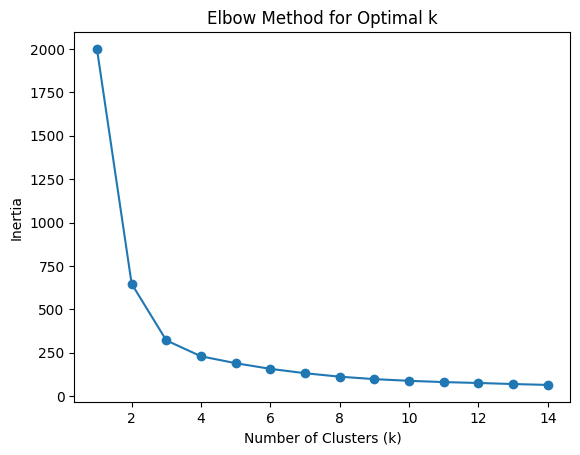

c:\users\abdullah shabbir\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


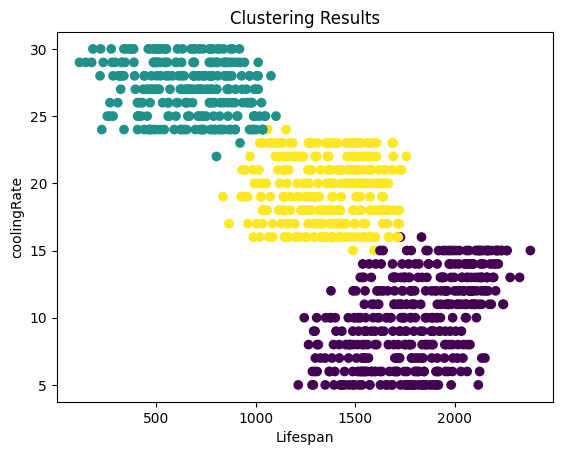

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data from the CSV file
df = pd.read_csv('COMP1801_CourseworkDataset1_tabular.csv')

# Select relevant continuous variables
continuous_vars = ['Lifespan', 'coolingRate']  # Replace with actual variable name
data_for_clustering = df[continuous_vars]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Choose the number of clusters (k)
# You can use the Elbow Method to find the optimal k
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the Elbow Method, choose the optimal k
optimal_k = 3  # Update this with the chosen value

# Apply K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Plot a scatter plot of the clustering results
plt.scatter(df['Lifespan'], df['coolingRate'], c=df['cluster'], cmap='viridis')
plt.xlabel('Lifespan')
plt.ylabel('coolingRate')
plt.title('Clustering Results')
plt.show()

